# Spotify Top Songs
The dataset contains the daily ranking of the 200 most listened songs in 53 countries from 2017 and 2018 in Spotify. It contains more than 2 million rows, which comprises 6629 artists, 18598 songs for a total count of one hundred five billion streams count. The goal of this project is to understand which features make a song popular. To that end, you are also provided with a file cointaining data about music attributes (i.e. speechiness,acousticness, tempo) for several popular songs. Given the large size of the dataset, feel free to simplify your task by working with rankings from only one country or for a single year. More info about this data [here](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking). 

In [1]:
import pandas as pd
ranking_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_1.csv")
ranking_1.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [2]:
ranking_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_2.csv")
ranking_2.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,54,Thunder,Imagine Dragons,5404,https://open.spotify.com/track/0tKcYR2II1VCQWT...,2017-08-24,cr
1,55,"Soy Peor Remix (feat. J Balvin, Ozuna & Arcangel)",Bad Bunny,5339,https://open.spotify.com/track/4UG962ViiLqoUyx...,2017-08-24,cr
2,56,Photograph,Ed Sheeran,5278,https://open.spotify.com/track/6fxVffaTuwjgEk5...,2017-08-24,cr
3,57,Thinking Out Loud,Ed Sheeran,5055,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2017-08-24,cr
4,58,Imitadora,Romeo Santos,4976,https://open.spotify.com/track/6r46lnXFbE9fr2d...,2017-08-24,cr


In [3]:
ranking_3 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_3.csv")
ranking_3.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,193,I'm the One,DJ Khaled,8316,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,2017-11-21,dk
1,194,God Dag,KESI,8298,https://open.spotify.com/track/4Jg4Qp4byYVpJ5m...,2017-11-21,dk
2,195,Castle on the Hill,Ed Sheeran,8293,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,2017-11-21,dk
3,196,September Song,JP Cooper,8278,https://open.spotify.com/track/2Inz7gGPGgieN0C...,2017-11-21,dk
4,197,Mi Gente (feat. Beyoncé),J Balvin,8261,https://open.spotify.com/track/7fwXWKdDNI5IutO...,2017-11-21,dk


In [4]:
features = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/featuresdf.csv")
features

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,288600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,239293.0,4.0
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,208053.0,4.0
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,165387.0,4.0
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075,214802.0,4.0


# Solución

El objetivo de este trabajo es encontrar qué atributos hacen que una canción sea popular. Para ello, se propone calcular para cada canción un índice que dé información acerca de su popularidad, para luego analizar la relación entre cada atributo y dicho índice.

En primer lugar, se define que una canción es más popular cuanto más gente la escucha y durante más tiempo. Es evidente entonces que cuanto más alto está en el ranking y cuantos más días permanece en un puesto alto, más popular es. Podría afirmarse además que la popularidad crece linealmente con la cantidad de días en el ranking. Esto es, por ejemplo, una canción que estuvo durante 30 días en el top-10 es aproximadamente 3 veces más popular que otra que estuvo 10 días en el top-10. Pero la popularidad no necesariamente escala de manera lineal con el puesto en el ranking. En cambio, la cantidad de reproducciones podría decirse que sí: una canción en el puesto 1° que fue 4 veces más escuchada que la canción en el puesto 2°, es aproximadamente 4 veces más popular. Todas estas definiciones son obviamente cuestionables.

Considerando lo anterior, se define entonces a la popularidad de una canción como la sumatoria de la cantidad de reproducciones en cada uno de los días que aparece en el ranking. La cantidad de reproducciones será normalizada como el porcentaje de reproducciones totales de ese día dentro del ranking.

Es esperable que la popularidad de una canción dependa mucho de la región en cuestión. Para este caso, resulta interesante analizar de qué depende la popularidad de una canción en Argentina. Para esto, puede pasar que no todas las canciones de las que se tiene información hayan aparecido alguna vez en el ranking argentino, por lo cual se procede a determinar qué porcentaje de ellas sí aparece.

<!-- 
# from time import mktime
# import datetime
# import matplotlib.pyplot as plt

# ts_1 = [mktime(datetime.datetime.strptime(x, "%Y-%m-%d").timetuple()) for x in ranking_1['Date']]
# plt.plot(ts_1) -->

In [5]:
import numpy as np

ranking_ar = ranking_1[ranking_1['Region'] == 'ar'].drop(columns='Region')

artists_ar = list(dict.fromkeys(ranking_ar['Artist']))
artists_ar = [x for x in artists_ar if str(x) != 'nan']

found_in_ar = []
for i in range(features.shape[0]):
    artist = features.iloc[i]['artists']
    name = features.iloc[i]['name']
    if artist in artists_ar:
        names = list(dict.fromkeys(ranking_ar[ranking_ar['Artist'] == artist]['Track Name']))
        found_in_ar.append(name in names)
    else:
        found_in_ar.append(False)

print('El ' + str(np.round(100*np.mean(found_in_ar), 1)) + '% de las canciones'
      + ' ha estado en el ranking de Argentina')

El 85.0% de las canciones ha estado en el ranking de Argentina


El 85% del dataset de features parece ser una cantidad considerable para que sea viable restringir el análisis a Argentina. Se comienza por filtrar del dataset de features las canciones que no han estado en el ranking de Argentina.

In [6]:
features_ar = features[found_in_ar]

Para cada canción se calcula la "popularidad" definida anteriormente.

In [7]:
import numpy as np

songs = {artist: [] for artist in list(dict.fromkeys(features_ar['artists']))}
for i in range(features_ar.shape[0]):
    songs[features_ar.iloc[i]['artists']].append(features_ar.iloc[i]['name'])

popularity_index = np.zeros((features_ar.shape[0],))

for i in range(ranking_ar.shape[0]):
    artist = ranking_ar.iloc[i]['Artist']
    name = ranking_ar.iloc[i]['Track Name']
    if artist in songs:
        if name in songs[artist]:
            idx, = np.where(np.logical_and(features_ar['artists'] == artist,
                                           features_ar['name'] == name))
            date = ranking_ar.iloc[i]['Date']
            total_streams = np.sum(ranking_ar[ranking_ar['Date'] == date]['Streams'])
            popularity_index[idx[0]] += ranking_ar.iloc[i]['Streams'] / total_streams
            
features_ar.reset_index(drop=True, inplace=True)
features_ar = pd.concat([features_ar, 
                         pd.DataFrame({'popularity_index':popularity_index})], axis=1)

Para corroborar si el índice de popularidad logra su objetivo, se ordena el dataset según dicho índice para ver si las canciones que mayor valor tienen realmente son las más escuchadas.

In [8]:
features_ar.sort_values('popularity_index', inplace=True, ascending=False)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(features_ar.iloc[:,[1,2,-1]])

                                  name         artists  popularity_index
2   Despacito (Featuring Daddy Yankee)      Luis Fonsi          7.540566
22                           Me Rehúso     Danny Ocean          6.608879
0                         Shape of You      Ed Sheeran          5.786475
42                       Felices los 4          Maluma          5.652973
54                           El Amante       Nicky Jam          4.809053
..                                 ...             ...               ...
55      You Don't Know Me - Radio Edit       Jax Jones          0.021582
33                      1-800-273-8255           Logic          0.021105
70                                Weak             AJR          0.011025
73                    I Like Me Better            Lauv          0.009049
53                                DNA.  Kendrick Lamar          0.001736

[85 rows x 3 columns]


Definitivamente "Despacito" tenía que estar en el top de la lista. Casi cualquier habitante joven argentino podría afirmar que las primeras 5 canciones fueron y son (en 2021) muy escuchadas mientras que las últimas 5 no. Esto verifica que este índice parece cumplir su objetivo.

Para analizar la relación entre los atributos y el índice de popularidad se realiza el siguiente gráfico.

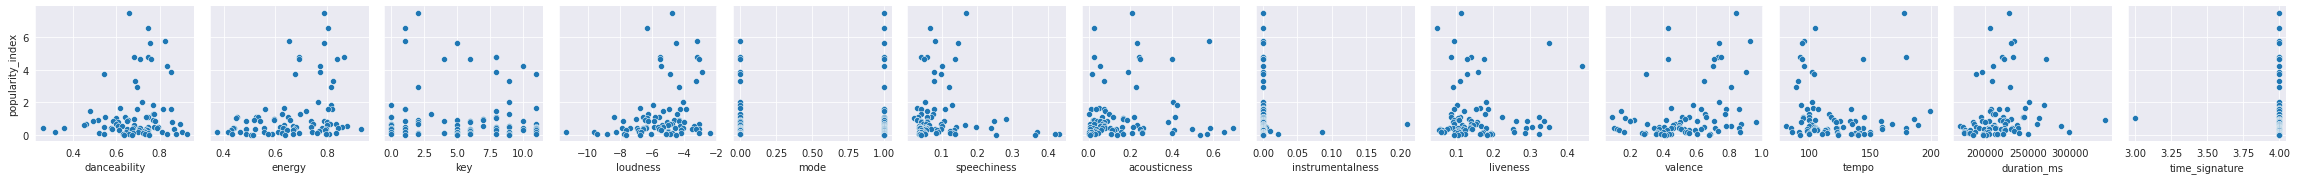

In [9]:
import seaborn as sns

sns.set_style('darkgrid')
sns.pairplot(data=features_ar, y_vars=['popularity_index'], 
             x_vars=features_ar.columns[3:16])

En primer lugar puede verse que los gráficos tienen una gran densidad de puntos para valores bajos de índice de popularidad. Esto puede deberse a que las canciones más populares son varias veces más escuchadas que las demás, no sólo porque más gente las escucha si no porque además las escuchan más veces. Esto podría indicar que los atributos estén relacionados de manera más lineal con el logaritmo del íncice de popularidad.

Por otro lado, las variables instrumentalness y time_signature tienen distribuciones de valores que están muy concentradas en un único valor. Esto hace que estos atributos no aporten información al modelo, o bien dicho de otro modo, no hay correlación entre estas variables y el índice de popularidad. Por eso se decide removerlas antes de realizar otros análisis.

Se procede entonces a graficar al logaritmo del índice de popularidad en función de los atributos.

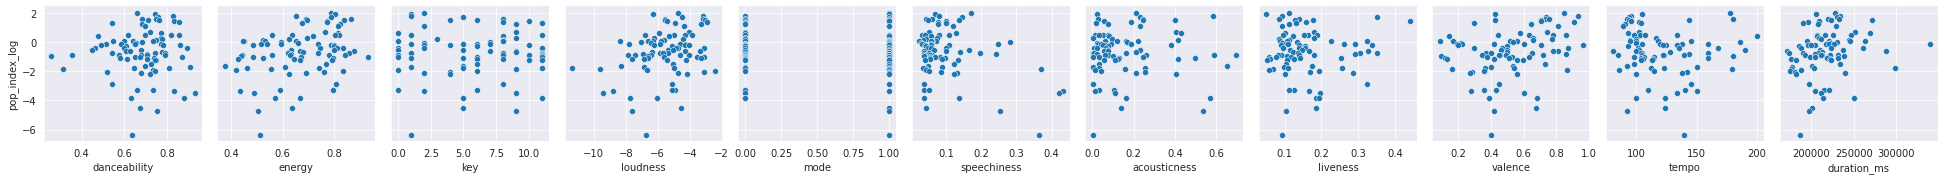

In [10]:
features_ar = features_ar.drop(columns=['instrumentalness', 'time_signature'])

sns.pairplot(data=pd.concat([features_ar, 
                             pd.DataFrame({'pop_index_log':np.log(features_ar.iloc[:,-1])})], 
                             axis=1), y_vars=['pop_index_log'], 
                                     x_vars=features_ar.columns[3:14])

Como se puede ver, algunos atributos parecieran estar más linealmente relacionados con la popularidad. Pero ahora ocurre lo contrario, la mayor densidad de puntos está en la mitad superior de los gráficos. Esto indica que tal vez la relación no sea exponencial (o logarítmica) si a algo mejor aproximable con polinomios.

Los atributos remanentes son todos numéricos a excepción de key y mode. Key representa la nota musical en la que está basada la canción (0 es Do y 11 es Si pasando por los sostenidos) y mode indica si la canción está en modo mayor o modo menor. Es decir, por ejemplo, si una canción está en Re mayor, los valores serán key=2 (Do, Do#, Re...) y mode=1 (0=menor, 1=mayor). 

Para el atributo key, la asignación de números a notas musicales tiene que ver con el orden en la escala musical, pero podrían estar ordenadas de cualquier otra forma. Esto es porque a los fines de hacer una regresión, este atributo es categórico, no tiene un orden estricto. Se podrían asignar valores numéricos a las notas, por ejemplo, de manera que se maximice la correlación entre el valor numérico y el índice de popularidad. Para ello se debe calcular la popularidad media de cada nota y ordenar las mismas en popularidad ascendente o descendente. Esto permitiría que un método de regresión pueda encontrar la dependencia entre la nota de la canción y su popularidad.

El atributo modo no parece tener una relación clara de ver con la popularidad. Si es que existe correlación, el R2 será muy elevado porque la varianza de ambos valores es muy alta. Aun así, si se combina con el atributo key, podría aportar mayor información. Por ejemplo, si se define una nueva variable que tenga todas las posibles combinaciones de ambas variables (Do menor, Sol mayor, etc.) y se las ordena por popularidad ascendente, puede que la correlación de este atributo combinado con la popularidad sea más elevada que considerándolos por separado.

Siguiendo con el razonamiento anterior, se decidió combinar estos dos atributos y además asignar valores numéricos que maximicen la correlación con el índice de popularidad. Los valores combinados serían {Do menor, Re menor, ..., La# mayor, Si mayor}. Luego se los ordena de forma acendente en función de su popularidad media.

In [11]:
key_new = np.zeros((features_ar.shape[0],))
for i in range(features_ar.shape[0]):
    key_new[i] = features_ar.iloc[i]['key'] + 12*features_ar.iloc[i]['mode']

# Asignación de números que maximicen la correlación
avg_popularity = np.zeros((24,))
for i, key in enumerate(range(24)):
    indices, = np.where(key_new == key)
    if np.any(indices):
        avg_popularity[i] = np.mean(features_ar.iloc[indices]['popularity_index'])

key_new_order = np.argsort(avg_popularity)
index_new_key = np.argsort(key_new_order)
for i in range(features_ar.shape[0]):
    features_ar.iloc[i,5] = index_new_key[int(key_new[i])]

features_ar = features_ar.drop(columns='mode')

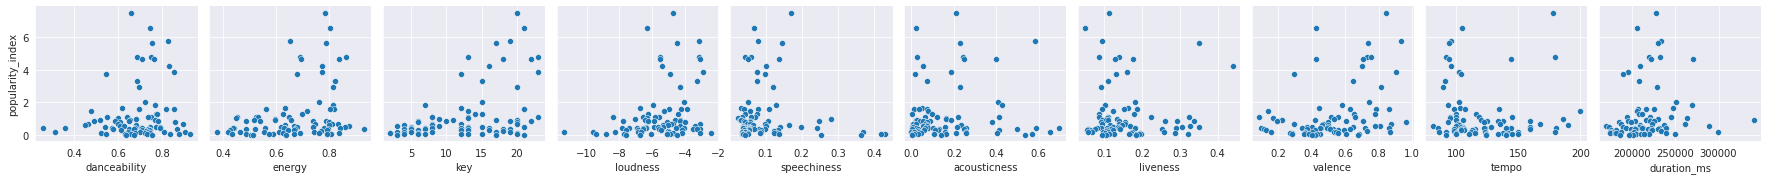

In [12]:
sns.pairplot(data=features_ar, y_vars=['popularity_index'], x_vars=features_ar.columns[3:13])

El atributo key tiene ahora la información del "key" original y de mode, y ahora parece distinguirse visualmente una correlación con popularity_index. 

Se procede entonces a normalizar los datos para luego poder calcular la importancia relativa de los coeficientes. Como los atributos en general no siguen distribuciones conocidas ni tienen outliers muy dispersos, se los mapea linealmente al rango [0,1].

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(features_ar.iloc[:,3:13].values)
y = features_ar.iloc[:,13].values

Ahora se procede a hacer una regresión lineal utilizando atributos polinomiales. Como método de regularización se propone Elastic-Net, ya que combina los beneficios de Lasso y Ridge. Como hay varios parámetros por configurar se utilizará Grid-Search utilizando como score el -MSE, ya que es preferible ante el R^2 para comparar modelos [[1]](https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

poly_features = PolynomialFeatures(include_bias=False)
elastic_net = ElasticNet(random_state=0)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'poly_features__degree': [1, 2, 3],
              'elastic_net__alpha': [0.2, 0.5, 1.0, 2.0, 4.0],
              'elastic_net__l1_ratio': [0.2, 0.5, 0.8],
              'elastic_net__selection': ['cyclic', 'random']}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

In [15]:
print('Mean test score:', gs.cv_results_['mean_test_score'])

Mean test score: [-3.07485575 -2.92895266 -2.87310197 -3.07485526 -2.92895282 -2.8730969
 -3.16631238 -3.08333824 -3.05680384 -3.1662963  -3.08334156 -3.05680705
 -3.21492523 -3.15302852 -3.15067259 -3.21492523 -3.15303594 -3.1506793
 -3.22016094 -3.13316689 -3.08689925 -3.22016044 -3.13316722 -3.08689938
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.2696047  -3.26096993 -3.25926613 -3.26973811 -3.26096493 -3.2592742
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 

In [16]:
print('Best score:', gs.best_score_)
print('Best params:', gs.best_params_)

Best score: -2.873096903814121
Best params: {'elastic_net__alpha': 0.2, 'elastic_net__l1_ratio': 0.2, 'elastic_net__selection': 'random', 'poly_features__degree': 3}


Como se puede ver, el MSE es bastante similar en la mayoría de los casos, siendo mejor para las primeras combinaciones. Dado que la variación de los parámetros fue considerable, sería prudente "muestrear" más fino en la zona donde el score es mayor. Se comienza viendo cuáles fueron las primeras 20 combinaciones, las cuales tuvieron mayor score.

In [17]:
for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value[0:20])

param_elastic_net__alpha : [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.5 0.5]
param_elastic_net__l1_ratio : [0.2 0.2 0.2 0.2 0.2 0.2 0.5 0.5 0.5 0.5 0.5 0.5 0.8 0.8 0.8 0.8 0.8 0.8
 0.2 0.2]
param_elastic_net__selection : ['cyclic' 'cyclic' 'cyclic' 'random' 'random' 'random' 'cyclic' 'cyclic'
 'cyclic' 'random' 'random' 'random' 'cyclic' 'cyclic' 'cyclic' 'random'
 'random' 'random' 'cyclic' 'cyclic']
param_poly_features__degree : [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2]
mean_test_score : [-3.07485575 -2.92895266 -2.87310197 -3.07485526 -2.92895282 -2.8730969
 -3.16631238 -3.08333824 -3.05680384 -3.1662963  -3.08334156 -3.05680705
 -3.21492523 -3.15302852 -3.15067259 -3.21492523 -3.15303594 -3.1506793
 -3.22016094 -3.13316689]


En cuanto al alpha, las combinaciones seleccionadas corresponden a alpha=0.2, por lo cual podría hacerse un barrido en torno a ese valor. El parámetro L1_ratio afecta negativamente al error cuando aumenta, lo cual es entendible. Esto es porque a mayor L1 hay coeficientes que directamente se hacen cero, y la métrica MSE no tiene en cuenta la complejidad del modelo, i.e. la cantidad de coeficientes. Se podría analizar cómo cambia la cantidad de coeficientes, pero no sé como hacerlo con GridSearch. Por esto, se configura l1_ratio=0. 

La selección de coeficientes al ser actualizados no cambia el resultado si se realiza de forma cíclica o aleatoria, por lo cual se deja en cíclica. Por otro lado, un mayor orden de los coeficientes polinomiales disminuye el error, lo cual es esperable. La contrapartida es que aumenta considerablemente la complejidad del modelo.

A continuación se varían los parámetros alpha y degree para analizar mejor su dependencia.

In [18]:
poly_features = PolynomialFeatures(include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, max_iter=10000)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'poly_features__degree': [2, 3, 4],
              'elastic_net__alpha': np.round(np.arange(0.05, 0.30, 0.05), 2)}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value)

param_elastic_net__alpha : [0.05 0.05 0.05 0.1 0.1 0.1 0.15 0.15 0.15 0.2 0.2 0.2 0.25 0.25 0.25]
param_poly_features__degree : [2 3 4 2 3 4 2 3 4 2 3 4 2 3 4]
mean_test_score : [-2.88900142 -2.88591278 -2.93894786 -2.84459792 -2.84241321 -2.86961266
 -2.82593906 -2.81655563 -2.83635037 -2.81994946 -2.79934992 -2.81395029
 -2.82076685 -2.78766336 -2.79729121]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.06280722575727, tolerance: 0.023483244703849503
  positive)


Los features polinomiales de 4to orden empeoran el error, lo cual es evidencia de overfitting. Puede que los de 3er orden sean innecesarios, ya que no mejoran el error de manera significativa respecto a los de 2do orden. Por ahora mantengo las de 3er orden y varío el alpha en un rango un poco más alto.

In [19]:
param_grid = {'elastic_net__alpha': np.round(np.arange(0.20, 0.50, 0.02), 2),
              'poly_features__degree': [2, 3]}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value)

param_elastic_net__alpha : [0.2 0.2 0.22 0.22 0.24 0.24 0.26 0.26 0.28 0.28 0.3 0.3 0.32 0.32 0.34
 0.34 0.36 0.36 0.38 0.38 0.4 0.4 0.42 0.42 0.44 0.44 0.46 0.46 0.48 0.48]
param_poly_features__degree : [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]
mean_test_score : [-2.81994946 -2.79934992 -2.81966485 -2.79412883 -2.82022432 -2.78965351
 -2.82146074 -2.78582343 -2.82324265 -2.78255566 -2.82546541 -2.77978098
 -2.82804486 -2.77744102 -2.83091268 -2.7754862  -2.83401298 -2.77387405
 -2.83729973 -2.77256796 -2.84073481 -2.77153618 -2.84428645 -2.770751
 -2.84792814 -2.77018816 -2.8516376  -2.76982626 -2.85539612 -2.76964639]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.86231180700398, tolerance: 0.023483244703849503
  positive)


Al parecer, con features de 2do orden el error disminuye al disminuir el alpha, y con features de 3er orden el error disminuye al aumentar el alpha. Además el error para 2do orden y alpha bajo es similar al error para 3er orden y alpha alto. Esto indicaría que con features de 3er orden se necesita más regularización, por lo que hay muchos coeficientes que no aportan al modelo. Cabe mencionar también que la cantidad de puntos del modelo es baja y la cantidad de features polinomiales de 3er orden muy alta en comparación. Se decide entonces utilizar sólo features polinomiales de 2do orden.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.52087708388834, tolerance: 0.023483244703849503
  positive)


Text(0.5, 1.0, '-MSE vs L2 penalty')

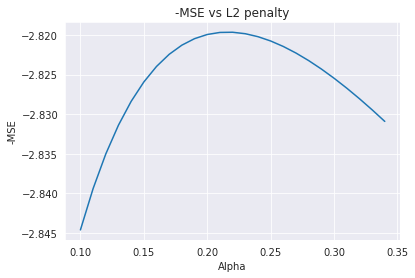

In [20]:
import matplotlib.pyplot as plt 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, max_iter=10000)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'elastic_net__alpha': np.round(np.arange(0.10, 0.35, 0.01), 2)}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

plt.plot(gs.cv_results_['param_elastic_net__alpha'], gs.cv_results_['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('-MSE')
plt.title('-MSE vs L2 penalty')

In [21]:
print('Best params:', gs.best_params_)

Best params: {'elastic_net__alpha': 0.22}


Se utiliza el modelo entonces con los parámetros óptimos y se analiza la importacia de los coeficientes de cada atributo. Para ello se calcula el porcentaje que representa el valor absoluto de cada coeficiente en la suma de los valores absolutos de los coeficientes.

In [22]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, alpha=0.22, max_iter=10000)

X_poly = poly_features.fit_transform(X)
elastic_net.fit(X_poly, y)

coefs = np.abs(elastic_net.coef_)
names = poly_features.get_feature_names(features_ar.columns[3:13])
idxs_sorted = np.argsort(coefs)[::-1]
coefs = coefs[idxs_sorted]
names = [names[i] for i in idxs_sorted]

for i in range(len(names)):
    print(names[i] + ':', coefs[i], '(' + str(np.round(100*coefs[i]/np.sum(coefs), 2)) + '%)')

energy key: 0.35937229700519563 (5.85%)
key^2: 0.3017777200018323 (4.91%)
key valence: 0.297441883278042 (4.84%)
key loudness: 0.28665279235830127 (4.67%)
key: 0.2827795413328139 (4.6%)
danceability key: 0.20847550700040804 (3.39%)
energy valence: 0.2023085901511418 (3.29%)
valence^2: 0.18941764758578455 (3.08%)
energy: 0.17988853357420098 (2.93%)
energy^2: 0.16910973662217793 (2.75%)
loudness valence: 0.16252830248561634 (2.65%)
key duration_ms: 0.15598882889081434 (2.54%)
danceability energy: 0.15468715726291382 (2.52%)
acousticness valence: 0.14653385355831727 (2.39%)
energy loudness: 0.13008463675521661 (2.12%)
tempo^2: 0.12937127480525001 (2.11%)
valence: 0.12863991586472073 (2.09%)
duration_ms: 0.12497309755820235 (2.03%)
key acousticness: 0.12389460024758996 (2.02%)
valence duration_ms: 0.11886119976642993 (1.93%)
loudness acousticness: 0.11237647547216519 (1.83%)
danceability duration_ms: 0.11151429319571453 (1.82%)
energy duration_ms: 0.10931327331390377 (1.78%)
energy acousti

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.52087708388834, tolerance: 0.023483244703849503
  positive)


Estos resultados parecen difíciles de analizar ya que aparecen combinaciones de atributos. Por ello se decide formar un único puntaje para cada atributo de la siguiente manera. Para cada atributo se calculará un promedio ponderado de los porcentajes anteriores, cuyos pesos serán 1 si el coeficiente depende de un sólo atributo o 1/2 si depende de 2 atributos.

<BarContainer object of 10 artists>

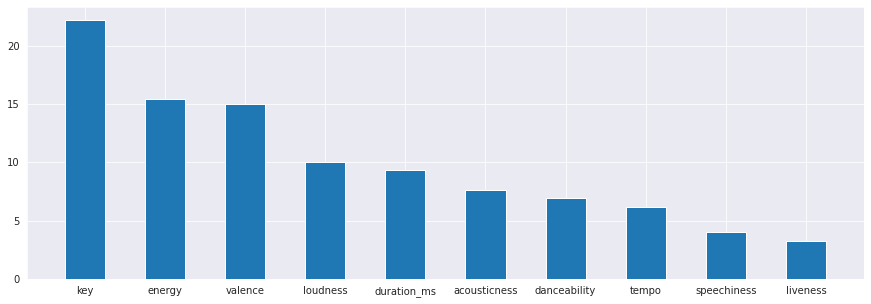

In [46]:
coefs_percent = 100*coefs/np.sum(coefs)
scores = {key: 0 for key in features_ar.columns[3:13]}

for key in scores.keys():
    for idx, name in enumerate(names):
        if key in name:
            w = 1 if name == key or name == key + '^2' else 1/2
            scores[key] += w*coefs_percent[idx]

scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(15,5))
plt.bar(scores.keys(), scores.values(), width=0.5)

# Discusión

Como se puede ver, key (en realidad, la combinación de key y mode) es el atributo que más "explica" la popularidad de una canción. En realidad, este resultado hay que tomarlo con pinzas porque la cantidad de muestras no es estadísticamente significativa. Es decir, al haber ordenado las notas musicales en popularidad ascendente, existe una probabilidad muy alta de que la correlación que se ve aquí sea debido a la propia variancia de los datos. Se necesitarían más datos para afirmar que esta correlación es significativa.

Para el resto de las variables no se realizó ningún ordenamiento, por lo cual podría decirse que los resultados son estadísticamente más significativos (aunque probablemente no lo suficiente, ya que sólo se analizan 85 canciones). Los atributos Energy y Valence fueron los más representativos, presentando una diferencia considerable con el resto. Energy representa la energía de la canción, relacionada con la intensidad y la actividad de la misma [[2]](https://www.kdnuggets.com/2021/04/song-popular-analyzing-top-songs-spotify.html). Las canciones con mucha energía tienden a sonar más fuerte y rápido. Por otro lado, las canciones con mayor Valence tienden a sonar más positivas. 

El tercer atributo más importante (descartando a key del análisis) es Loudness, el cual representa el volumen general de la canción. Según la definición de Energy, estos atributos deberían estar relacionados de cierta manera, lo cual se corresponde con el hecho de que estén en el top 3 de atributos más relacionados a la popularidad.

Finalmente, es interesante ver que Duration está entre la mitad más importante de atributos. Parece ser que la duración de una canción es un factor importante en el éxito de la misma, más que otros que a priori parecen ser más importantes (como Danceability o Tempo).

# Conclusión

Los métodos de regresión resultan útiles no sólo para predecir valores numéricos a partir de un conjunto de datos, si no para analizar la relación entre variables independientes y dependiente. Esto último es lo que se realizó en este trabajo, y en particular resultaría útil para una productora musical que quiere hacer de una canción un "hit". Por ejemplo, teniendo una canción ya compuesta, podría producirse agregando arreglos o instrumentos que mejoren las métricas de Energy y Valence, o podría ajustarse el tempo y la duración a lo que el modelo predice que será más exitoso.

